# 第八次读书笔记+作业

学号：20179065 $ \qquad $ 班级序列号：170230 $ \qquad $ 姓名：董秩序

## 偏最小二乘回归建模原理

设有 q个因变量${y1,…,yq}$和p自变量${x1,…,xp}$。
为了研究因变量和自变量的统计关系,观测了n个样本点,
由此构成了自变量与因变量的数据表$X={x1,…,xp}和.Y={y1,…,yp}$。

偏最小二乘回归分别在X与Y中提取出成分t1和u1，即t1是$x1,x2,…,xq$的线形组合, 
u1是$y1,y2,…,yp$的线形组合.
在提取这两个成分时,为了回归分析的需要,有下列两个要求:
   * t1和u1应尽可能大地携带他们各自数据表中的变异信息
   * t1与u1的相关程度能够达到最大。
  
在第一个成分t1和u1被提取后，偏最小二乘回归分别实施X对t1的回归以及Y对u1的回归。
如果回归方程已经达到满意的精度，则算法终止；否则,将利用*X被 t1 解释后的残余信息*以及*Y 被t2解释后的残余信息*进行第二轮的成分提取。

如此往复，直到能达到一个较满意的精度为止。若最终对 X共提取了m个成分$t1,t2,…,tm$，偏最小二乘回归将通过实施yk对$t1,t2,…,tm$的回归,然后再表达成yk关于原变量$X1,X2,…,Xq$的回归方程$(k=1,2,…,p)$。

## 推导偏最小二乘回归

### step1:数据说明与标准化

数据矩阵$E0，F0$，
其中E0为自变量矩阵，F0是因变量矩阵，每一行是一个样例，每一列代表了一个维度的变量；

数据标准化即**数据中心化**，对每个样本都做如下操作：
减去一个维度变量的均值除以该维度的标准差。

以下设E0，F0都为标准化了的数据。即：
自变量经标准化处理后的数据矩阵记为$E0（n*m）$，
因变量经标准化处理后的数据矩阵记为$F0（n*p）$

### step2:求符合要求的主成分

即求自变量与因变量的第一对主成分t1和u1。因为方差最大则表示的信息就越多,所以
要求t1与u1的协方差达到最大，即：

$Cov(t1,u1)-> max$

而且，$t1$是X的线性组合，那么权重系数设为$W1$，即$t1 = E0W1$，同理，$u1$是Y的线性组合，$u1 = F0C1$。同时又要求，W1与C1同为单位向量:


$max<E0w1,F0c1> S.T. ∥w1∥=1;∥c1∥=1$

通过拉格朗日求解，得$w1$就是矩阵$E0'F0F0'E0$的对应于最大特征值的特征向量，$c1$就是矩阵$F0’E0E0’F0$对应于最大特征值的最大特征向量，均单位化。

有了权系数$w1，c1$，可以求得主成分$t1，u1$。

### step3:建立主成分与原自变量、因变量之间的回归

建立E0，F0对$t1，u1$的三个回归方程:

$E0=t1p1+E1$

$F0=u1q1+F^*1$

$F0=t1r1+F1$

$E1,F^*1,F1$分别是三个回归方程的残差矩阵.

### step4:继续求主成分，直到满足要求

用残差矩阵E1和F1取代E0和F0,然后,求第二个轴$w2和c2$以及第二个成分$t2,u2$,有:

$t2=E1w2$ 

$u2=F1c2$

重复执行step3。直到求出所有主成分或者满足要求。

### step5:推导因变量之于自变量的回归表达式

若E0的秩为A，则可以求出：

$E_0=t_1p'1+Λ+t_Ap'_A$

$F_0=t_1r'1+Λ+t_Ar'_A+F_A$

由于$t1….tA$都可以表示$E01，E02….E0q$的线性组合，那么就可以还原成：
$y_k^*=ak_1x_1+Λ+ak_px'_p+FA_k \qquad k =1,2,...q$ 

$Fa_k$为残差矩阵Fa的第k列。这样，就求出了回归方程。

In [3]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import csv

In [22]:
filename = "E:/Documents/DAY/基于python的数据分析/data/nirpyresearch-master/data/peach_spectra_brixvalues.csv"
#df = pd.read_csv(filename)
#X = df.as_matrix(columns=['Brix'])
#w1 = df.as_matrix(columns=['wl1'])
with open(filename) as f: #获取每个频谱都有一个与之相关的相应的糖度值
    X = np.loadtxt(f,delimiter = ",", skiprows = 1)[:,1:601]
with open(filename) as f: #获取Brix
    y = np.loadtxt(f,delimiter = ",", skiprows = 1)[:,:1]
wl = range(1100,2300,2) #波长点
y = np.squeeze(y) #numpy的降维

In [6]:
# Define PLS object
pls = PLSRegression(n_components=5)
# Fit
pls.fit(X, y)
# Cross-validation
y_cv = cross_val_predict(pls, X, y, cv=10)
# Calculate scores
score = r2_score(y, y_cv)
mse = mean_squared_error(y, y_cv)

In [7]:
def plot(wl,X):
    plt.figure(figsize=(8,4.5))
    with plt.style.context(('ggplot')):
        plt.plot(wl, X.T)
        plt.xlabel('Wavelength (nm)')
        plt.ylabel('D2 Absorbance')
        plt.show()

数据由新鲜桃子的50个NIR光谱组成。
每个频谱都有一个与之相关的相应的糖度值（响应）。
每个光谱在1100 nm至2300 nm的600个波长点上以2 nm为步长进行采集。

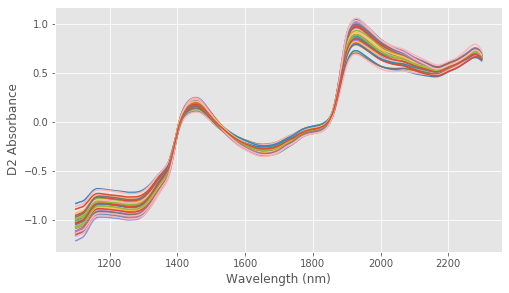

In [24]:
plot(wl,X)

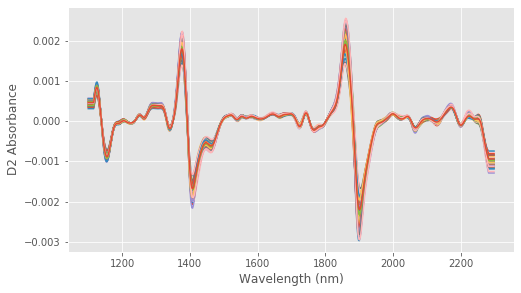

'偏移量消失了，数据更加聚集在一起'

In [9]:
# Calculate second derivative二阶导数
X2 = savgol_filter(X, 17, polyorder = 2,deriv=2)
# Plot second derivative
plot(wl,X2)
'''偏移量消失了，数据更加聚集在一起'''

optimise_pls_cv函数首先对PLS组件的数量运行循环，然后计算预测的MSE。
它找到使MSE最小化的组件数量，并使用该值再次运行PLS。
第二次计算并打印大量指标。

In [17]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=10)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/40
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Suggested number of components: ", msemin+1)
    stdout.write("\n")
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Number of PLS components')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
        
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=10)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))
        ax.scatter(y_c, y, c='red', edgecolors='k')
        #Plot the best fit line
        ax.plot(np.polyval(z,y), y, c='blue', linewidth=1)
        #Plot the ideal 1:1 line
        ax.plot(y, y, color='green', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()
    return

第一个图是MSE与组件数量的关系。
图中突出显示了建议的使MSE最小化n_components

第二个图是实际的回归图，包括预测的指标。

100% completed
Suggested number of components:  7



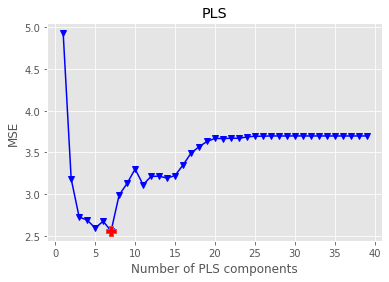

R2 calib: 0.859
R2 CV: 0.451
MSE calib: 0.657
MSE CV: 2.558


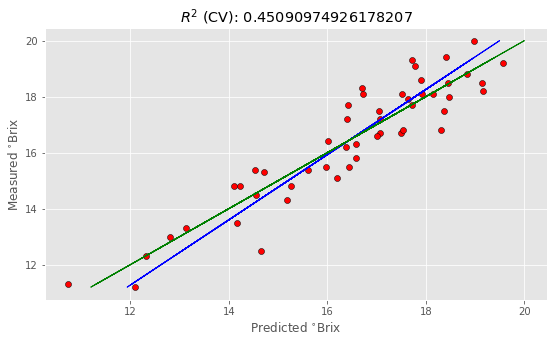

In [23]:
optimise_pls_cv(X2,y, 40, plot_components=True)

## Procedure of NIPALS

### Inner loop of the iterative NIPALS algorithm
NIPALS迭代算法的内循环

In [ ]:
def _nipals_twoblocks_inner_loop(X, Y, max_iter=500, tol=1e-06,):  
    y_score = Y[:, [0]] 
    x_weights_old = 0
    ite = 1

    while True:
        x_weights = np.dot(X.T, y_score) / np.dot(y_score.T, y_score) 
        x_weights /= np.sqrt(np.dot(x_weights.T, x_weights)) 
        x_score = np.dot(X, x_weights) 
        y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score) 
        y_score = np.dot(Y, y_weights) / np.dot(y_weights.T, y_weights) 
        x_weights_diff = x_weights - x_weights_old
        if np.dot(x_weights_diff.T, x_weights_diff) < tol :
            break

        if ite == max_iter:
            warnings.warn('Maximum number of iterations reached')
            break
        x_weights_old = x_weights
        ite += 1

    return x_weights, y_weights  

### Center X and Y

In [ ]:
def _center_xy(X, Y):      

    # center
    x_mean = X.mean(axis=0)
    X_center = np.subtract(X, x_mean)
    y_mean = Y.mean(axis=0)
    Y_center = np.subtract(Y, y_mean)

    return X_center, Y_center, x_mean, y_mean


### NIPALS

In [ ]:
class _NIPALS(): 
    def __init__(self, n_components, max_iter=500, tol=1e-06, copy=True):
        self.n_components = n_components
        self.max_iter = max_iter         
        self.tol = tol
        self.copy = copy

    def fit(self, X, Y, n_components):    
        n = X.shape[0]
        p = X.shape[1]
        q = Y.shape[1]

        if n != Y.shape[0]:    
                'Incompatible shapes: X has %s samples, while Y '
                'has %s' % (X.shape[0], Y.shape[0])
        if self.n_components < 1 or self.n_components > p: 
            raise ValueError('invalid number of components')

        Xcenter, Ycenter, self.x_mean_, self.y_mean_ = _center_xy(X, Y) 
        # Residuals (deflated) matrices
        Xk = Xcenter
        Yk = Ycenter
        # Results matrices
        self.x_scores_ = np.zeros((n, self.n_components))  
        self.y_scores_ = np.zeros((n, self.n_components))  
        self.x_weights_ = np.zeros((p, self.n_components)) 
        self.y_weights_ = np.zeros((q, self.n_components)) 
        self.x_loadings_ = np.zeros((p, self.n_components)) 
        self.y_loadings_ = np.zeros((q, self.n_components))
 
        # NIPALS algo: outer loop, over components
        for k in range(self.n_components):
            x_weights, y_weights = _nipals_twoblocks_inner_loop(
                    X=Xk, Y=Yk, max_iter=self.max_iter, tol=self.tol,)
            # compute scores
            x_scores = np.dot(Xk, x_weights) 
            y_ss = np.dot(y_weights.T, y_weights)
            y_scores = np.dot(Yk, y_weights) / y_ss  
            x_loadings = np.dot(Xk.T, x_scores) / np.dot(x_scores.T, x_scores)
            # - substract rank-one approximations to obtain remainder matrix
            Xk -= np.dot(x_scores, x_loadings.T)

            y_loadings = (np.dot(Yk.T, x_scores) / np.dot(x_scores.T, x_scores))
            Yk -= np.dot(x_scores, y_loadings.T)
            self.x_scores_[:, k] = x_scores.ravel()  # T    
            self.y_scores_[:, k] = y_scores.ravel()  # U   
            self.x_weights_[:, k] = x_weights.ravel()  # W   
            self.y_weights_[:, k] = y_weights.ravel()  # C   
            self.x_loadings_[:, k] = x_loadings.ravel()  # P 
            self.y_loadings_[:, k] = y_loadings.ravel()  # Q 
           
        lists_coefs = []              
        for i in range(n_components):   
            self.x_rotations_ = np.dot(self.x_weights_[:, :i + 1], linalg.inv(np.dot(self.x_loadings_[:, :i + 1].T, self.x_weights_[:, :i + 1])))
            self.coefs = np.dot(self.x_rotations_, self.y_loadings_[:, :i + 1].T)
             
            lists_coefs.append(self.coefs)
        
        return lists_coefs 

    def predict(self, x_test, coefs_B, xtr_mean, ytr_mean):

        xte_center = np.subtract(x_test, xtr_mean)
        y_pre = np.dot(xte_center, coefs_B)
        y_predict = np.add(y_pre, ytr_mean)          
 
        return y_predict